In [1]:
!pip install --user networkx

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

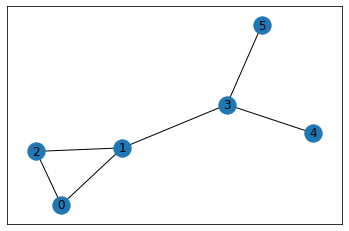

In [3]:
class GraphVisualization:
   
    def __init__(self):
        self.visual = []
          
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
          
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()

G = GraphVisualization()
G.addEdge(0, 2)
G.addEdge(1, 2)
G.addEdge(1, 3)
G.addEdge(5, 3)
G.addEdge(3, 4)
G.addEdge(1, 0)
G.visualize()

In [4]:
x = 5
if 0 < x < 10:
    print(x)

5


In [ ]:
import unittest

if __name__ == "__main__":
    unittest.main()

In [ ]:
from typing import Dict, List, Union


class Vertex:
    def __init__(self, name):
        self.name = name
        self.marked = False
        self.weight = None
        
    def __eq__(self, v):
        if isinstance(v, Vertex):
            return self.name == v.name
        if isinstance(v, str):
            
            return self.name == v
    
class Edge:
    def __init__(self, v1, v2, w):
        self.v1 = v1
        self.v2 = v2
        self.weight = w 

class Graph:
    def __init__(self, sa: Dict[str, List[Union[str, float, int]]]):
        self._sa = sa  # список смежности
        self._vertices = list([Vertex(el) for el in sa.keys()])  # список вершин
        self._d = {el.name: el for el in self._vertices}
        self._edges = self._get_edges()
    
    def _get_edges(self):
        edges = []
        for v, vs in self._sa.items():
            for vi, wi in vs:
                edges.append(Edge(self._d[v], self._d[vi], wi))
        return edges
                

    def get_vertex_with_min_weight_not_marked(self):
        # возвращает не пройденную вершину с минимальным весом
        _, v = min([(el.weight, el) for el in self._vertices if not el.marked])
        return v

    def get_weights_edges(self):
        # возвращает список весов всех ребер
        return list([el.weight for el in self._edges])

    def vertices(self):
        # возвращает список вершин
        return self._vertices
    
    def adjacency_nodes_ribbles(self, v):
        a = []
        for name, w in self._sa[v.name]:
            a.append((self._d[name], w))
        return a

        
def dijkstra(g, v0):
    # Алгоритм Дейкстры(Список смежности, Начальную) -> 
    #     Вершины с расстоянием до них, Пути до вершин
    
    # посчитать сумму всех весов
    s = sum(g.get_weights_ribbles()) + 1
    
    # устанавливает для v0 вес в 0 а для остальных вес в сумма всех весов + 1
    for v in g.nodes():
        if v == v0:
            v.weight = 0
        else:
            v.weight = s

    while True:
        # Выбираем вершину с минимальным весом не пройденную
        v = g.get_node_with_min_weight()
        if v is None:
            break

        # Идем по смежным к ней вершинам не пройденным
        for vi, wi in g.adjacency_nodes_ribbles(v):
            if not vi.marked:
                #      Обновляем веса min(было, стало)
                vi.weight = min(vi.weight, v.weight + wi)
        # Помечаем вершину как пройденную
        v.marked = True
        
    return g




